In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [8]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step


Note I follow geeks for geeks here to understand

In [9]:
model = tf.keras.models.Sequential() #using sequential meaning we have a pipeline of sorts
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #reshaping to 28 by 28
model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu)) #we will have 2 dense layers the numbers i chose have no significance i was just trying
model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #we have 10 digits to predict based on (0-9) so 10 layer softmax
 
model.compile(optimizer='adam', #good based on my experience
              loss='sparse_categorical_crossentropy', #also good based on my experience
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=3)

c:\Users\elwal\anaconda3\envs\tweleve\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8794 - loss: 0.4200
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9704 - loss: 0.0982
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9826 - loss: 0.0580


In [10]:
def draw(n):
    plt.imshow(n,cmap=plt.cm.binary)
    plt.show() 

In [13]:
predictions=model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step


Y ->  4
prediction ->  4


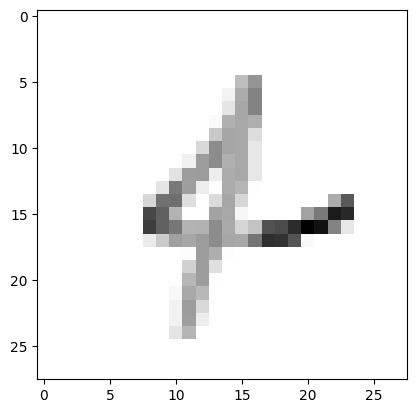

In [15]:
print('Y -> ',y_test[300])
print('prediction -> ',np.argmax(predictions[300]))
draw(x_test[300])

In [16]:
model.save('digit_predictor.h5')